In [195]:
# 导入需要的包以及解决中文乱码的问题
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd 
import numpy as np

cd_second_data = pd.read_csv(r'./datas/chengdu/secondHand.csv',encoding="gbk")
cd_regions = ['中心城区', '郊区新城', '全市']
cd_columns = ['总面积（平方米）', '住宅套数(套)', '住宅面积(平方米)', '非住宅面积（平方米）']

cd_bussiness_data = pd.read_csv(r'./datas/chengdu/bussiness.csv',encoding="gbk")

rm_weekend = True  # 是否删除周末数据
show_polyfit = True  # 曲线拟合

In [196]:
from datetime import datetime

def is_workday(day_str, separator=""):
    """
    if a day is workday
    :param day_str: string of a day
    :param separator: separator of year, month and day, default is empty
    :return: True: is workday; False: not workday
    """
    spec = "%Y" + separator + "%m" + separator + "%d"
    day = datetime.strptime(day_str, spec).date()
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [0, 1, 2, 3, 4]:
        return True
    else:
        return False


def is_weekend(day_str, separator=""):
    """
    if a day is weekend
    :param day_str: string of a day
    :param separator: separator of year, month and day, default is empty
    :return: True: is weekend; False: not weekend
    """
    spec = "%Y" + separator + "%m" + separator + "%d"
    day = datetime.strptime(day_str, spec).date()
    # Monday == 0 ... Sunday == 6
    if day.weekday() in [5, 6]:
        return True
    else:
        return False

In [197]:
cd_second_data['is_workday']=cd_second_data['日期'].astype(str).map(lambda x:is_workday(x))
cd_bussiness_data['is_workday']=cd_bussiness_data['日期'].astype(str).map(lambda x:is_workday(x))
print(cd_second_data)

       区域   总面积（平方米）  住宅套数(套)  住宅面积(平方米)  非住宅面积（平方米）        日期  is_workday
0    中心城区   27572.66      2.0     249.30    27323.36  20230528       False
1    郊区新城     860.94      3.0     251.17      609.77  20230528       False
2      全市   28433.60      5.0     500.47    27933.13  20230528       False
3    中心城区  150539.56    903.0  125256.51    25283.05  20230529        True
4    郊区新城   17716.44    116.0   14281.10     3435.34  20230529        True
..    ...        ...      ...        ...         ...       ...         ...
139  郊区新城   10458.21     92.0   10122.30      335.91  20230720        True
140    全市   76505.53    696.0   67381.04     9124.49  20230720        True
141  中心城区   70858.18    605.0   59058.84    11799.34  20230721        True
142  郊区新城   15035.54    137.0   14051.94      983.60  20230721        True
143    全市   85893.72    742.0   73110.78    12782.94  20230721        True

[144 rows x 7 columns]


In [198]:
def parse_region_data(data, region_key_word, region_names, not_zero_name, rm_weekend=True):
    region_data_list = []
    for region in region_names:
        region_data = data[data[region_key_word] == region]
        region_data = region_data[region_data[not_zero_name] > 0]
        if rm_weekend:
            region_data.drop(region_data[region_data['is_workday'] == False].index, inplace=True)

        region_data_list.append(region_data)
    return region_data_list

In [199]:
cd_region_data_list = parse_region_data(cd_second_data, '区域', cd_regions, '总面积（平方米）')
print(cd_region_data_list[2])

     区域   总面积（平方米）  住宅套数(套)  住宅面积(平方米)  非住宅面积（平方米）        日期  is_workday
5    全市  168256.00   1019.0  139537.61    28718.39  20230529        True
8    全市   87880.54    799.0   76042.39    11838.15  20230530        True
11   全市   85042.40    783.0   76588.45     8453.95  20230531        True
14   全市   80952.21    773.0   73856.74     7095.47  20230601        True
17   全市   83195.47    769.0   74002.91     9192.56  20230602        True
23   全市  108401.01   1022.0   98594.23     9806.78  20230605        True
26   全市   84246.35    798.0   77200.06     7046.29  20230606        True
29   全市   84038.59    783.0   76695.51     7343.08  20230607        True
32   全市   93736.19    869.0   84680.76     9055.43  20230608        True
41   全市   89933.43    819.0   78434.20    11499.23  20230613        True
44   全市   77858.64    692.0   67548.53    10310.11  20230614        True
47   全市   86682.71    808.0   78119.11     8563.60  20230615        True
50   全市   91312.90    832.0   80365.02    10947.88 

In [203]:
def show_lineplot(data, date, cd_columns):

    fig, axs = plt.subplots(2, 2, figsize=(30, 25), dpi=100, sharex=True)

    axs[0, 0].plot(date, data[cd_columns[0]], label=cd_columns[0])
    axs[0, 0].scatter(date, data[cd_columns[0]])
    axs[0, 0].set_title(cd_columns[0], fontdict={'size': 20})

    axs[0, 1].plot(date, data[cd_columns[1]], label=cd_columns[1])
    axs[0, 1].scatter(date, data[cd_columns[1]])
    axs[0, 1].set_title(cd_columns[1], fontdict={'size': 20})
    
    axs[1, 0].plot(date, data[cd_columns[2]], label=cd_columns[2])
    axs[1, 0].scatter(date, data[cd_columns[2]])
    axs[1, 0].set_title(cd_columns[2], fontdict={'size': 20})
    
    axs[1, 1].plot(date, data[cd_columns[3]], label=cd_columns[3])
    axs[1, 1].scatter(date, data[cd_columns[3]])
    axs[1, 1].set_title(cd_columns[3], fontdict={'size': 20})

    axs[0, 0].legend(loc='best')
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)
    axs[0, 0].set_xlabel("日期", fontdict={'size': 16})
    axs[0, 1].legend(loc='best')
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)
    axs[0, 1].set_xlabel("日期", fontdict={'size': 16})
    axs[1, 0].legend(loc='best')
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)
    axs[1, 0].set_xlabel("日期", fontdict={'size': 16})
    axs[1, 1].legend(loc='best')
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)
    axs[1, 1].set_xlabel("日期", fontdict={'size': 16})
    
    if show_polyfit:
        # 绘制拟合曲线
        deg = 2
        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[0]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[0, 0].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[1]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[0, 1].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[2]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[1, 0].plot(date, y_value)

        poly = np.polyfit(np.linspace(1, len(date), len(date)), np.array(data[cd_columns[3]]).astype(int), deg=deg)
        y_value = np.polyval(poly.astype(int), np.linspace(1, len(date), len(date)))
        axs[1, 1].plot(date, y_value)

    fig.autofmt_xdate()
    plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
    plt.show()

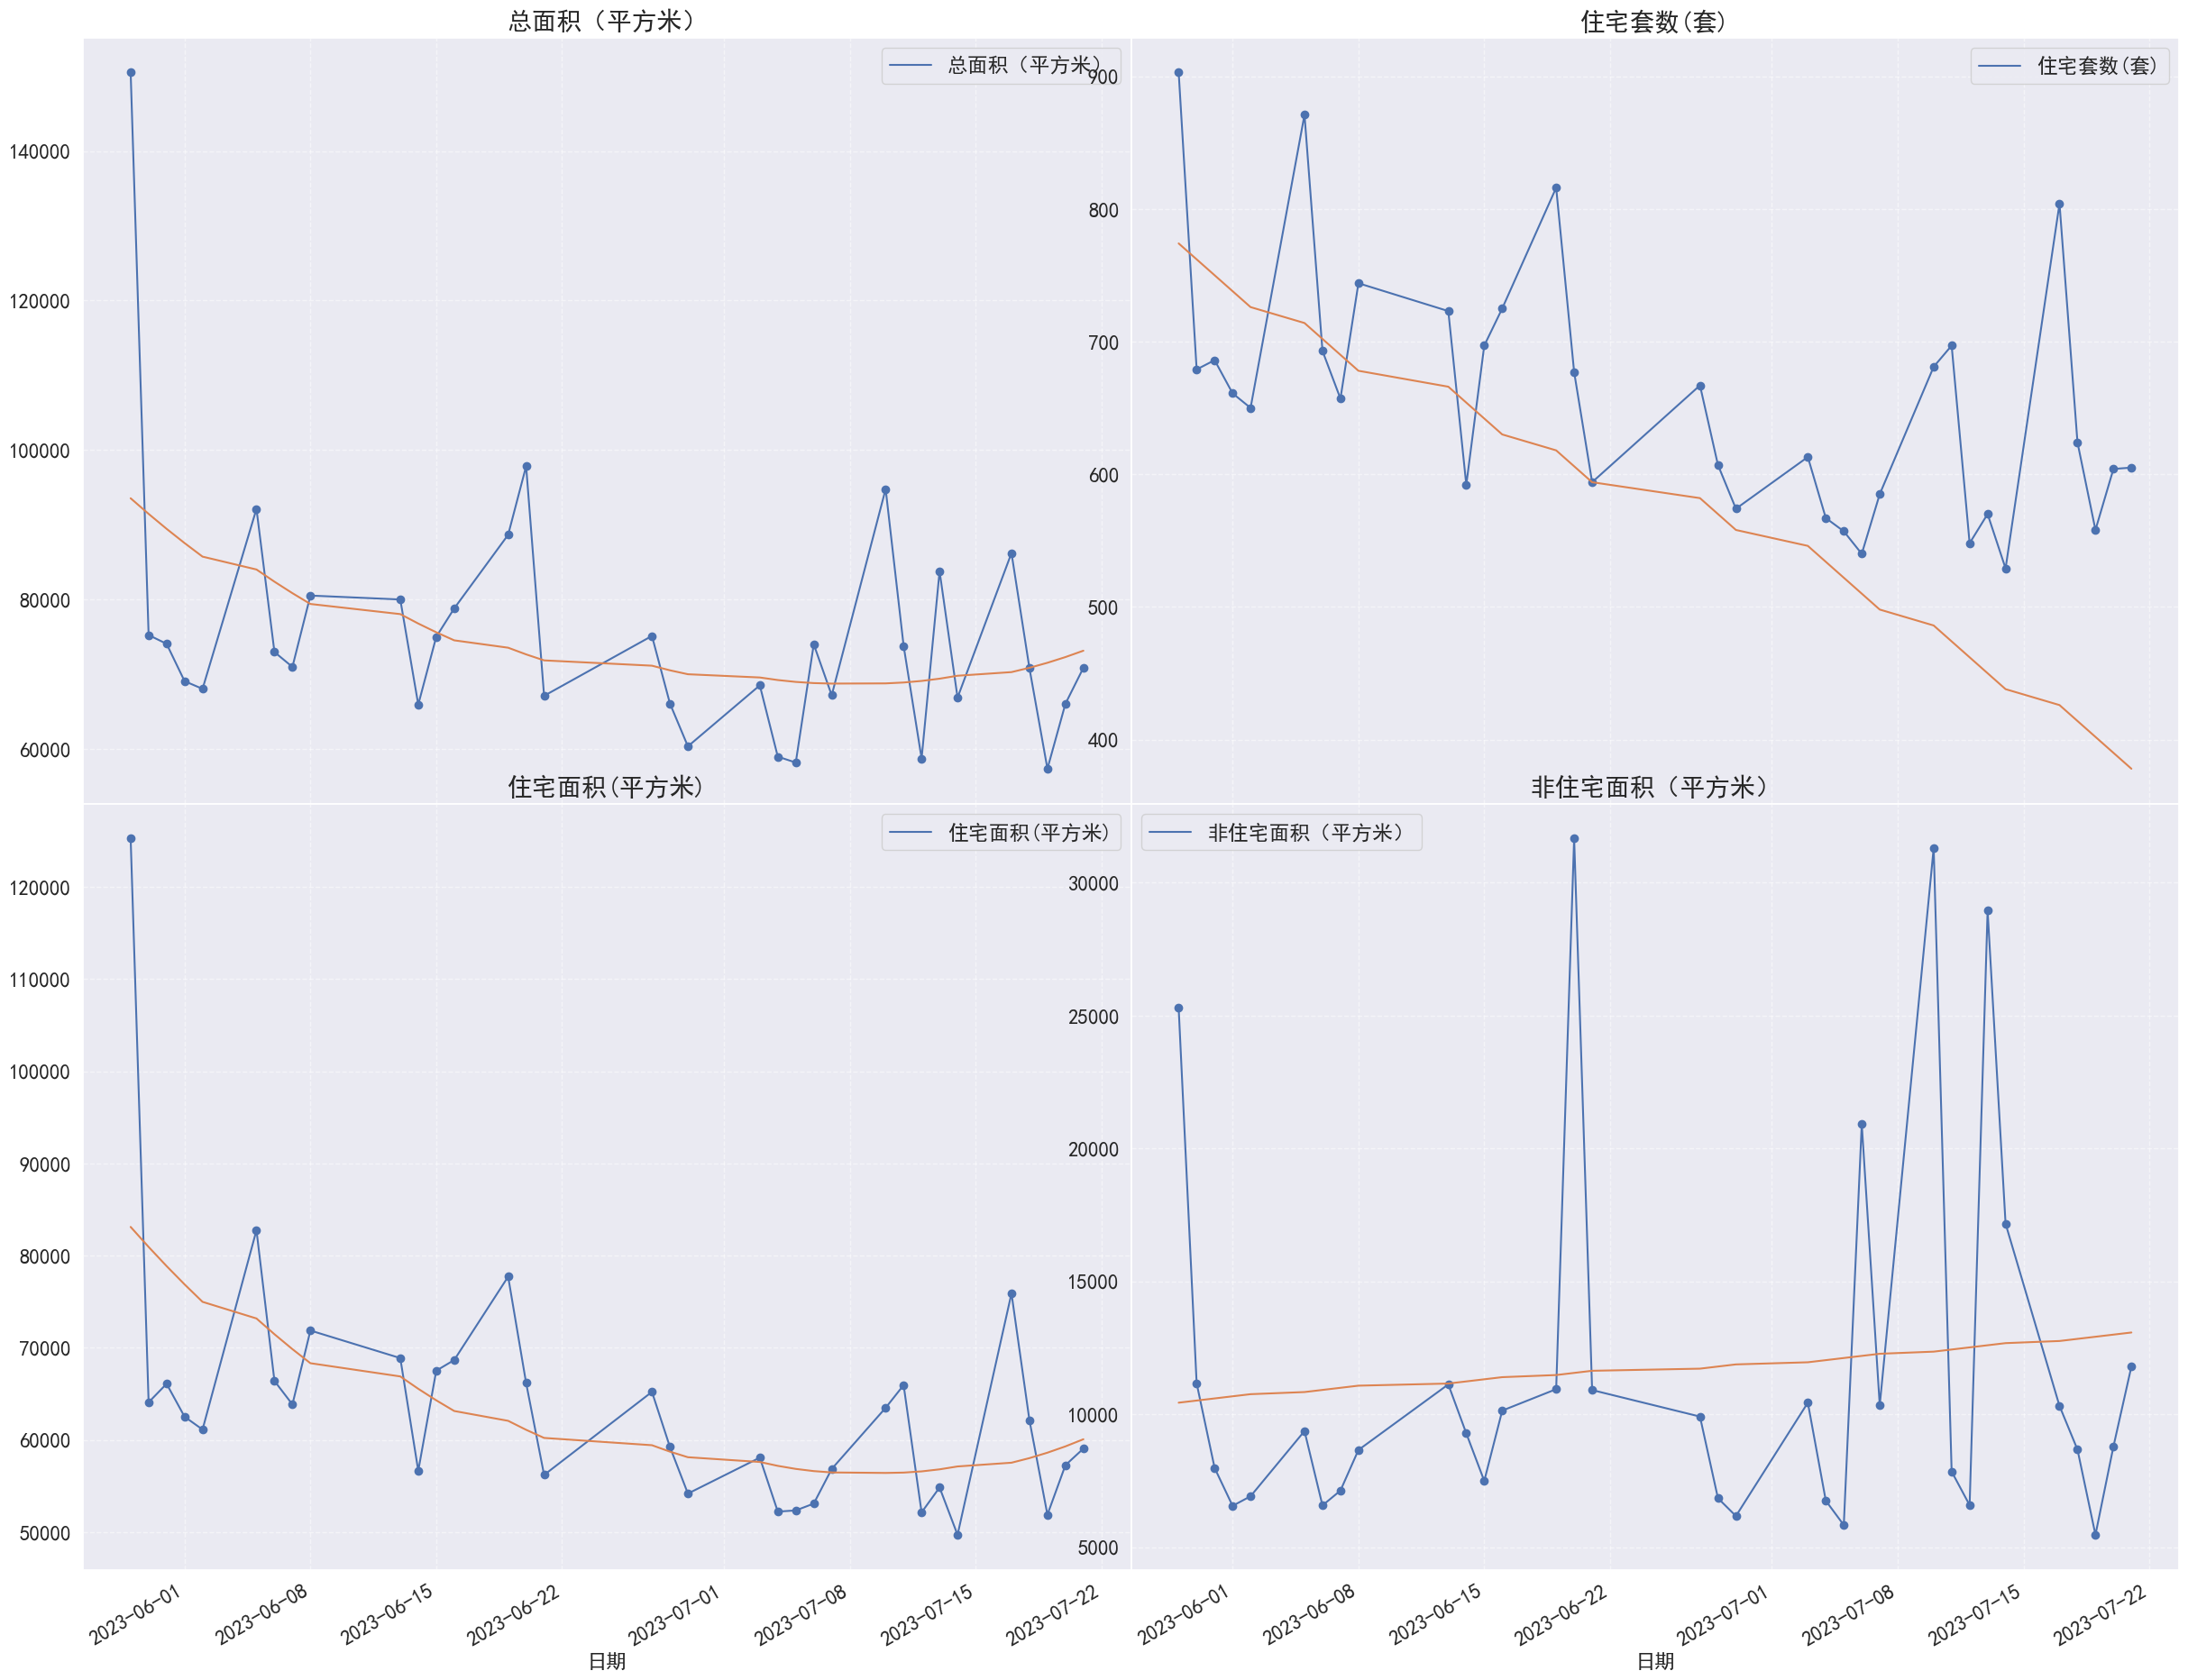

In [204]:
# 成都 二手房 日数据

cd_region_data_list = parse_region_data(cd_second_data, '区域', cd_regions, '总面积（平方米）', rm_weekend)

date = cd_region_data_list[0]['日期']
date=pd.to_datetime(date, format='%Y%m%d')

show_lineplot(cd_region_data_list[0], date, cd_columns)

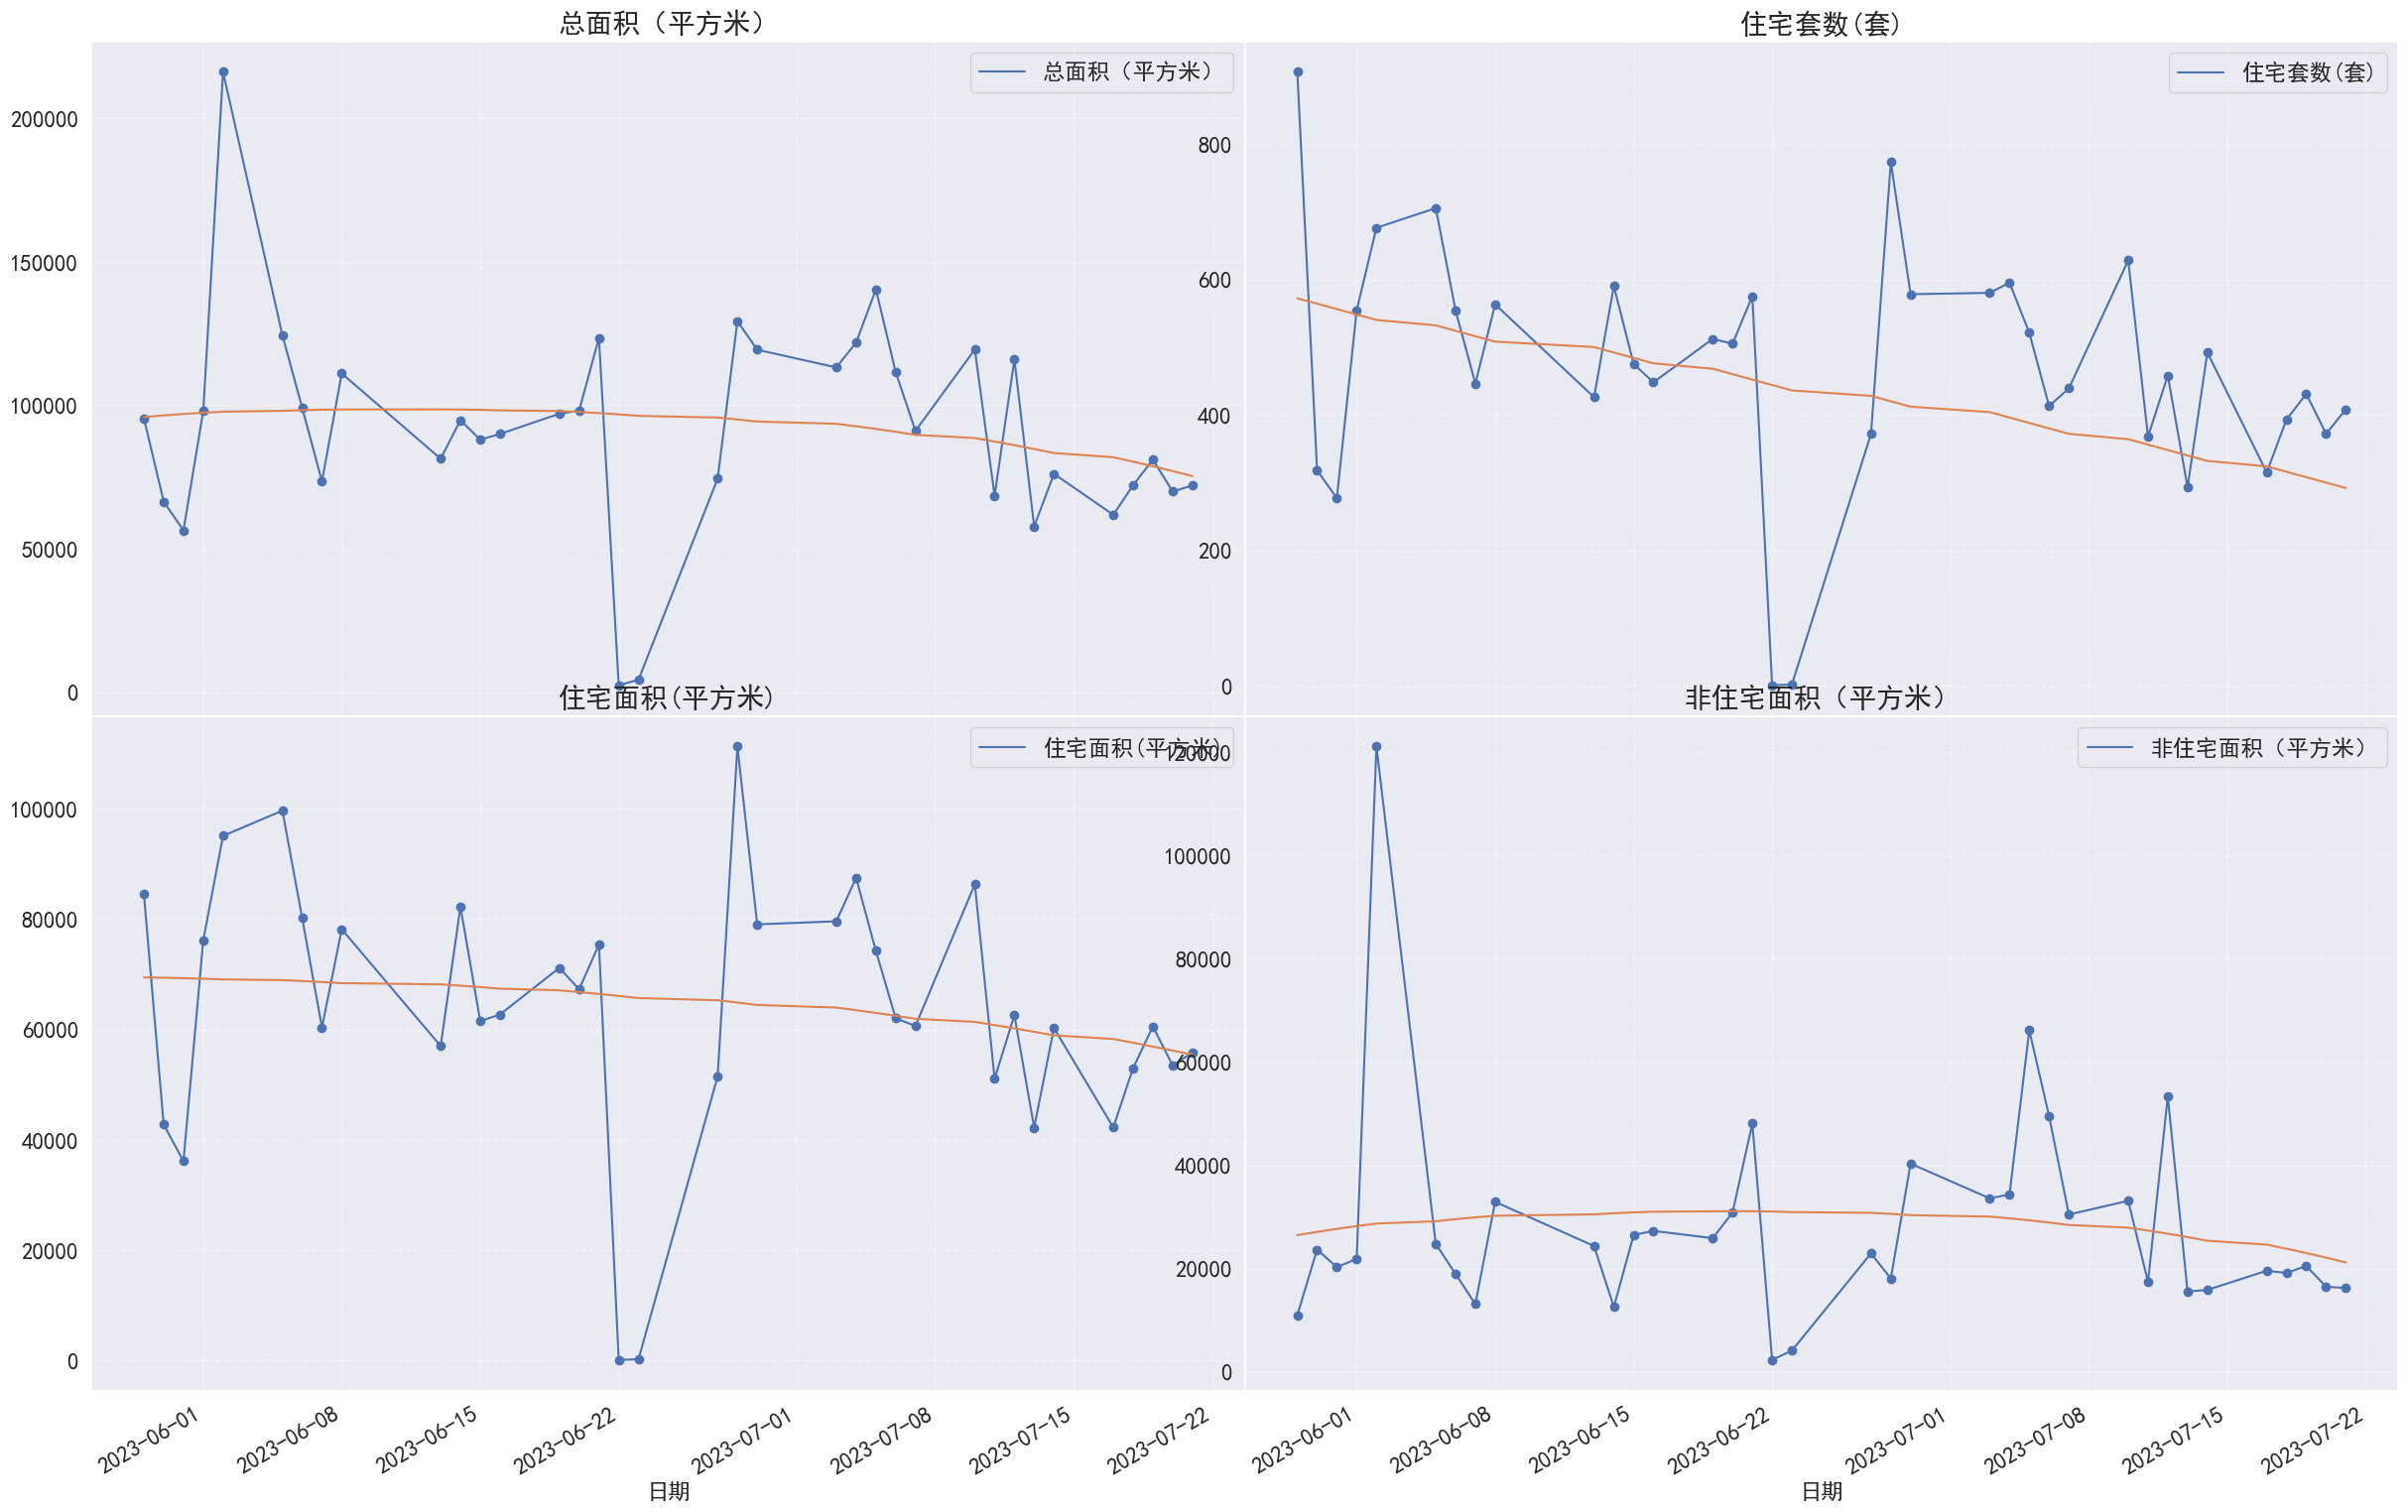

In [202]:
# 成都 商品房 日数据

cd_region_data_list2 = parse_region_data(cd_bussiness_data, '区域', cd_regions, '总面积（平方米）', rm_weekend)

date2 = cd_region_data_list2[0]['日期']
date2=pd.to_datetime(date2, format='%Y%m%d')

show_lineplot(cd_region_data_list2[0], date2, cd_columns)